# 📊 Clase Previa: Trabajando con Archivos CSV y XLSX en Python
### 🎯 Objetivos de Hoy:
1. Aprender a cargar archivos CSV y Excel (XLSX)
2. Explorar y entender nuestros datos
3. Seleccionar y filtrar información
4. Crear visualizaciones básicas

## 📚 Parte 1: Importar las Librerías Necesarias

Primero, necesitamos importar las herramientas que vamos a usar:

### 📦 Instalación de Librerías

**¿Qué es uv?** Gestor de paquetes moderno (10-100x más rápido que pip), escrito en Rust.  
**Antes se usaba:** `pip install` (gestor tradicional de Python, más lento).

#### Paso 1: Instalar uv (solo una vez)
```bash
pip install uv
```

#### Paso 2: Instalar las librerías con uv
Para instalar las librerías necesarias, ejecuta en tu terminal (una por una):

```bash
uv add pandas
uv add matplotlib
uv add numpy
uv add openpyxl
```

O si prefieres instalarlas todas de una vez:
```bash
uv add pandas matplotlib numpy openpyxl
```

In [108]:
# Importar las librerías necesarias
import pandas as pd  # Para trabajar con datos en tablas (CSV, Excel)
import matplotlib.pyplot as plt  # Para crear gráficos
import numpy as np  # Para operaciones matemáticas

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


In [ ]:
import pandas as pd
print(np.__version__)


1.26.4


## 📂 Parte 2: Cargar Archivos CSV y XLSX

Vamos a trabajar con datos reales del SENAMHI (Servicio Nacional de Meteorología e Hidrología del Perú)

### 🔹 Diferencias principales:
- **CSV**: Archivo de texto plano separado por comas (`,`) u otro delimitador
- **XLSX**: Archivo de Excel que puede tener múltiples hojas y formato

### 📄 Caso 1: Cargar archivo CSV básico

In [71]:
# Cargar archivo CSV simple
# df_csv = pd.read_csv('archivo.csv')

# Ejemplo con el archivo de contaminantes (CSV)
df_csv = pd.read_csv('datos02.csv')
# df_csv
print("✅ Archivo CSV cargado exitosamente")
print(f"📊 Dimensiones: {df_csv.shape[0]} filas x {df_csv.shape[1]} columnas")
print(f"📋 Columnas: {df_csv.columns.tolist()[:]}...")  # Primeras 5 columnas


✅ Archivo CSV cargado exitosamente
📊 Dimensiones: 577794 filas x 15 columnas
📋 Columnas: ['ID', 'ESTACION', 'FECHA', 'HORA', 'LONGITUD', 'LATITUD', 'ALTITUD', 'PM10', 'PM2_5', 'NO2', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'FECHA_CORTE']...


### 📄 Caso 2: Cargar archivo CSV con delimitador diferente
Algunos archivos CSV usan `;` (punto y coma) en lugar de `,` (coma)

In [78]:
# Si el CSV usa punto y coma como separador
df_csv_semicolon = pd.read_csv('datos02.csv', sep=',')
df_csv_semicolon
# Si usa tabulador
# df_csv_tab = pd.read_csv('archivo.csv', sep='\t')

# Si usa pipe
# df_csv_pipe = pd.read_csv('archivo.csv', sep='|')

# print("💡 Usa el parámetro 'sep' para especificar el delimitador")


,ID,ESTACION,FECHA,HORA,LONGITUD,LATITUD,ALTITUD,PM10,PM2_5,NO2,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE
0,1,CAMPO_DE_MARTE,20150101,50000,-77.0432,-12.0705,117.0,37.920,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531
1,2,CAMPO_DE_MARTE,20150101,60000,-77.0432,-12.0705,117.0,153.390,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531
2,3,CAMPO_DE_MARTE,20150101,70000,-77.0432,-12.0705,117.0,116.490,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531
3,4,CAMPO_DE_MARTE,20150101,80000,-77.0432,-12.0705,117.0,80.740,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531
4,5,CAMPO_DE_MARTE,20150101,90000,-77.0432,-12.0705,117.0,27.400,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577789,577790,VILLA_MARIA_DEL_TRIUNFO,20240531,190000,-76.9200,-12.1664,272.0,12.340,12.290,42.8,LIMA,LIMA,VILLA_MARIA_DEL_TRIUNFO,150143.0,20240531
577790,577791,VILLA_MARIA_DEL_TRIUNFO,20240531,200000,-76.9200,-12.1664,272.0,12.110,12.070,39.9,LIMA,LIMA,VILLA_MARIA_DEL_TRIUNFO,150143.0,20240531
577791,577792,VILLA_MARIA_DEL_TRIUNFO,20240531,210000,-76.9200,-12.1664,272.0,8.320,8.300,27.4,LIMA,LIMA,VILLA_MARIA_DEL_TRIUNFO,150143.0,20240531
577792,577793,VILLA_MARIA_DEL_TRIUNFO,20240531,220000,-76.9200,-12.1664,272.0,8.520,8.440,31.6,LIMA,LIMA,VILLA_MARIA_DEL_TRIUNFO,150143.0,20240531


### 📄 Caso 3: Cargar CSV sin cabecera (sin nombres de columnas)

In [ ]:
# Si el archivo NO tiene fila de encabezado
# df_sin_header = pd.read_csv('archivo.csv', header=None)

# Puedes asignar nombres manualmente
# df_sin_header.columns = ['col1', 'col2', 'col3']

# df = pd.read_csv('datos02.csv', header=None, names=['col1', 'col2', 'col3'])


print("💡 Usa 'header=None' si el archivo no tiene nombres de columnas")


💡 Usa 'header=None' si el archivo no tiene nombres de columnas


### 📊 Caso 4: Cargar archivo XLSX (Excel) básico

In [ ]:
# Cargar archivo Excel básico
# df = pd.read_excel('archivo.xlsx')

# Ejemplo con datos del SENAMHI
df = pd.read_excel('senamhi_by_station.xlsx')

print("✅ Archivo XLSX cargado exitosamente")
print(f"📊 Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")



### 📊 Caso 5: Cargar XLSX con múltiples hojas
Archivos Excel pueden tener varias hojas (sheets)

In [ ]:
# Ver qué hojas tiene el archivo Excel
# excel_file = pd.ExcelFile('senamhi_by_station.xlsx')
# print("Hojas disponibles:", excel_file.sheet_names)

# Cargar una hoja específica por nombre
# df_hoja1 = pd.read_excel('senamhi_by_station.xlsx', sheet_name='Campo_De_Marte_MET_EMA')
# df_hoja1
# Cargar una hoja específica por índice (0 = primera hoja)
df_primera = pd.read_excel('senamhi_by_station.xlsx', sheet_name=1)
df_primera
# df_segunda = pd.read_excel('senamhi_by_station.xlsx', sheet_name=1)

# Cargar TODAS las hojas a la vez (devuelve un diccionario)
# all_sheets = pd.read_excel('senamhi_by_station.xlsx', sheet_name=None)
# df_hoja1 = all_sheets['NombreHoja1']
# df_hoja2 = all_sheets['NombreHoja2']

# print("💡 Usa 'sheet_name' para especificar qué hoja cargar")


,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
0,2020/09/01,00:00,14.8,89.8,172,0.5
1,2020/09/01,01:00,14.8,90.4,222.3,0.5
2,2020/09/01,02:00,14.6,90.9,194.9,0.8
3,2020/09/01,03:00,14.6,90.9,216.1,0.3
4,2020/09/01,04:00,14.5,91.2,198.9,1.0
...,...,...,...,...,...,...
39130,2025/09/13,08:00,17.5,84.8,75.79,0.4
39131,2025/09/13,09:00,19.2,79.62,220.8,0.7
39132,2025/09/13,10:00,20.4,73.53,232.5,0.7
39133,2025/09/13,11:00,22.2,65.57,275.2,1.3


### 📊 Caso 7: Cargar solo algunas filas
Útil para archivos muy grandes o para pruebas rápidas

In [96]:
# Cargar solo las primeras 100 filas
df_sample = pd.read_excel('senamhi_by_station.xlsx', nrows=2)
df_sample

# Saltar las primeras 5 filas (útil si hay metadatos al inicio)
# df_skip = pd.read_csv('archivo.csv', skiprows=5)

# Saltar filas específicas (ejemplo: saltar filas 1, 3 y 5)
# df_skip_specific = pd.read_csv('archivo.csv', skiprows=[1, 3, 5])

# print("💡 Usa 'nrows' para limitar filas, 'skiprows' para saltarlas")


,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
0,2020/10/01,00:00,16.0,0,88,217,1.5
1,2020/10/01,01:00,15.9,0,89,214,1.3


### 📊 Caso 8: Cargar solo columnas específicas
Útil cuando solo necesitas algunas columnas de un archivo grande

In [107]:
# Cargar solo columnas específicas por nombre
df_cols = pd.read_excel('senamhi_by_station.xlsx', sheet_name=0 , usecols=['TEMPERATURA (°C)'], nrows=10)
df_cols

# Cargar solo columnas específicas por índice (0, 1, 2 = primeras 3 columnas)
# df_cols_index = pd.read_csv('archivo.csv', usecols=[0, 1, 2])

# print("💡 Usa 'usecols' para cargar solo las columnas que necesitas")


,TEMPERATURA (°C)
0,16.0
1,15.9
2,16.1
3,15.8
4,15.6
5,15.7
6,15.6
7,15.5
8,16.0
9,16.6


### 📊 Caso 9: Valores nulos personalizados
A veces los valores nulos están representados de forma diferente

In [106]:
# Pandas reconoce como nulos: NaN, NA, NULL, None
# Pero a veces los datos usan otras representaciones

# Definir valores personalizados como nulos
df_nulls = pd.read_excel('senamhi_by_station.xlsx', na_values=['N/A', 'Sin dato', '-', '?', ''])
print(df_nulls)

# Ejemplo: considerar 'S/D' y '---' como valores nulos
# df_custom = pd.read_csv('archivo.csv', na_values=['S/D', '---', 'ND'])

# print("💡 Usa 'na_values' para especificar qué valores considerar como nulos")


      AÑO / MES / DÍA   HORA TEMPERATURA (°C) PRECIPITACIÓN (mm/hora)  \
0          2020/10/01  00:00               16                       0   
1          2020/10/01  01:00             15.9                       0   
2          2020/10/01  02:00             16.1                       0   
3          2020/10/01  03:00             15.8                       0   
4          2020/10/01  04:00             15.6                       0   
...               ...    ...              ...                     ...   
43189      2025/09/13  08:00             15.3                       0   
43190      2025/09/13  09:00             16.2                       0   
43191      2025/09/13  10:00             17.7                       0   
43192      2025/09/13  11:00             19.1                       0   
43193      2025/09/13  12:00             20.3                       0   

      HUMEDAD (%) DIRECCION DEL VIENTO (°) VELOCIDAD DEL VIENTO (m/s)  
0              88                      217         

In [105]:
df.isnull().sum()


AÑO / MES / DÍA               0
HORA                          0
TEMPERATURA (°C)              0
PRECIPITACIÓN (mm/hora)       0
HUMEDAD (%)                   0
DIRECCION DEL VIENTO (°)      0
VELOCIDAD DEL VIENTO (m/s)    0
dtype: int64

### 📊 Resumen: Parámetros más útiles

| Parámetro | CSV | XLSX | Descripción |
|-----------|-----|------|-------------|
| `sep` | ✅ | ❌ | Delimitador (`,`, `;`, `\t`, `\|`) |
| `encoding` | ✅ | ❌ | Codificación (`utf-8`, `latin-1`) |
| `header` | ✅ | ✅ | Fila de encabezado (None si no tiene) |
| `sheet_name` | ❌ | ✅ | Nombre o índice de hoja Excel |
| `nrows` | ✅ | ✅ | Número de filas a cargar |
| `skiprows` | ✅ | ✅ | Filas a saltar al inicio |
| `usecols` | ✅ | ✅ | Columnas específicas a cargar |
| `na_values` | ✅ | ✅ | Valores a considerar como nulos |

## 🔍 Parte 3: Explorar los Datos

Es fundamental conocer qué datos tenemos antes de analizarlos:

In [116]:
# Ver las primeras 5 filas
print("🔹 Primeras 5 filas del dataset:")
print(df.tail())


🔹 Primeras 5 filas del dataset:
      AÑO / MES / DÍA   HORA TEMPERATURA (°C) PRECIPITACIÓN (mm/hora)  \
43189      2025/09/13  08:00             15.3                       0   
43190      2025/09/13  09:00             16.2                       0   
43191      2025/09/13  10:00             17.7                       0   
43192      2025/09/13  11:00             19.1                       0   
43193      2025/09/13  12:00             20.3                       0   

      HUMEDAD (%) DIRECCION DEL VIENTO (°) VELOCIDAD DEL VIENTO (m/s)  
43189          90                      220                        0.5  
43190          86                      248                          1  
43191          79                      232                        1.9  
43192          76                      229                        1.9  
43193          73                      233                        1.8  


In [117]:
# Ver información general del dataset
print("🔹 Información general del dataset:")
print(df.info())
print("\n")
print("🔹 Nombres de las columnas:")
print(df.columns.tolist())


🔹 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43194 entries, 0 to 43193
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AÑO / MES / DÍA             43194 non-null  object
 1   HORA                        43194 non-null  object
 2   TEMPERATURA (°C)            43194 non-null  object
 3   PRECIPITACIÓN (mm/hora)     43194 non-null  object
 4   HUMEDAD (%)                 43194 non-null  object
 5   DIRECCION DEL VIENTO (°)    43194 non-null  object
 6   VELOCIDAD DEL VIENTO (m/s)  43194 non-null  object
dtypes: object(7)
memory usage: 2.3+ MB
None


🔹 Nombres de las columnas:
['AÑO / MES / DÍA', 'HORA', 'TEMPERATURA (°C)', 'PRECIPITACIÓN (mm/hora)', 'HUMEDAD (%)', 'DIRECCION DEL VIENTO (°)', 'VELOCIDAD DEL VIENTO (m/s)']


### ⚠️ IMPORTANTE: Verificar y Corregir Tipos de Datos

**¿Por qué es crucial verificar los tipos de datos?**

Pandas **NO siempre** detecta automáticamente el tipo correcto. Debes revisar `df.info()` y corregir según la naturaleza de cada columna:

| Tipo de Dato Real | Convertir a | Función |
|-------------------|-------------|---------|
| Números (temperatura, edad) | `float64` o `int64` | `pd.to_numeric()` |
| Fechas (2024-10-10) | `datetime64` | `pd.to_datetime()` |
| Texto/Categorías (nombre, ciudad) | `string` o `category` | `.astype('string')` |
| Porcentajes (guardados como texto) | `float64` | `pd.to_numeric()` después de limpiar `%` |
| Booleanos (Sí/No, True/False) | `bool` | `.astype('bool')` |

**Consecuencias de NO corregir tipos:**
- ❌ No puedes hacer cálculos matemáticos
- ❌ Los gráficos fallan o se ven mal
- ❌ Filtros y ordenamientos incorrectos
- ❌ Mayor uso de memoria

### 🔧 Ejemplo 1: Información General

In [118]:
# Convertir columnas numéricas que Pandas leyó como texto
# errors='coerce' convierte valores no numéricos en NaN

df['TEMPERATURA (°C)'] = pd.to_numeric(df['TEMPERATURA (°C)'], errors='coerce')
df['VELOCIDAD DEL VIENTO (m/s)'] = pd.to_numeric(df['VELOCIDAD DEL VIENTO (m/s)'], errors='coerce')
df['HUMEDAD (%)'] = pd.to_numeric(df['HUMEDAD (%)'], errors='coerce')
df['PRECIPITACIÓN (mm/hora)'] = pd.to_numeric(df['PRECIPITACIÓN (mm/hora)'], errors='coerce')
df['DIRECCION DEL VIENTO (°)'] = pd.to_numeric(df['DIRECCION DEL VIENTO (°)'], errors='coerce')

print("✅ Columnas convertidas a tipo numérico")


✅ Columnas convertidas a tipo numérico


In [119]:
# Ver información general del dataset
print("🔹 Información general del dataset:")
print(df.info())
print("\n")
print("🔹 Nombres de las columnas:")
print(df.columns.tolist())


🔹 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43194 entries, 0 to 43193
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AÑO / MES / DÍA             43194 non-null  object 
 1   HORA                        43194 non-null  object 
 2   TEMPERATURA (°C)            43060 non-null  float64
 3   PRECIPITACIÓN (mm/hora)     43108 non-null  float64
 4   HUMEDAD (%)                 42971 non-null  float64
 5   DIRECCION DEL VIENTO (°)    43109 non-null  float64
 6   VELOCIDAD DEL VIENTO (m/s)  41604 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.3+ MB
None


🔹 Nombres de las columnas:
['AÑO / MES / DÍA', 'HORA', 'TEMPERATURA (°C)', 'PRECIPITACIÓN (mm/hora)', 'HUMEDAD (%)', 'DIRECCION DEL VIENTO (°)', 'VELOCIDAD DEL VIENTO (m/s)']


### 🔧 Ejemplo 3: Estadisticas

In [120]:
# Estadísticas descriptivas de las columnas numéricas
print("🔹 Estadísticas descriptivas:")
print(df.describe())


🔹 Estadísticas descriptivas:
       TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)   HUMEDAD (%)  \
count      43060.000000             43108.000000  42971.000000   
mean          19.166869                 0.001097     83.680338   
std            3.476377                 0.013991      8.769423   
min           12.100000                 0.000000     48.000000   
25%           16.300000                 0.000000     78.000000   
50%           18.800000                 0.000000     85.000000   
75%           21.500000                 0.000000     90.000000   
max           33.700000                 1.000000    100.000000   

       DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
count              43109.000000                41604.000000  
mean                 224.538078                    1.123978  
std                   35.692441                    0.600306  
min                    0.000000                    0.000000  
25%                  212.000000                    0.700000  
50% 

## 🎯 Parte 4: Seleccionar y Filtrar Datos

Aprendamos a seleccionar columnas específicas y filtrar información:

### 📌 Conceptos clave:
- **Serie**: Una sola columna (como una lista) → `df['columna']`
- **DataFrame**: Tabla con varias columnas → `df[['col1', 'col2']]`
- **Filtrado**: Seleccionar filas que cumplen condiciones → `df[df['temperatura'] > 25]`

**Métodos avanzados (para más adelante):**
- `.loc[]` - Seleccionar por etiquetas (nombres)
- `.iloc[]` - Seleccionar por posición (índices numéricos)
- `.query()` - Filtrar con sintaxis SQL

In [121]:
# Ejemplo 1: Seleccionar UNA columna (el resultado es una Serie)
# Cambia 'nombre_columna' por el nombre real de tu columna
# Por ejemplo, si tienes una columna de temperatura, usa ese nombre

# Primero, veamos qué columnas tenemos disponibles
print("Columnas disponibles en el dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


Columnas disponibles en el dataset:
1. AÑO / MES / DÍA
2. HORA
3. TEMPERATURA (°C)
4. PRECIPITACIÓN (mm/hora)
5. HUMEDAD (%)
6. DIRECCION DEL VIENTO (°)
7. VELOCIDAD DEL VIENTO (m/s)


In [124]:
# Ejemplo 2: Seleccionar una columna específica
# Reemplaza 'primera_columna' con el nombre real de tu columna
primera_columna = df.columns[2]  # Toma la primera columna automáticamente

print(f"🔹 Datos de la columna '{primera_columna}':")
print(df[primera_columna].head(10))


🔹 Datos de la columna 'TEMPERATURA (°C)':
0    16.0
1    15.9
2    16.1
3    15.8
4    15.6
5    15.7
6    15.6
7    15.5
8    16.0
9    16.6
Name: TEMPERATURA (°C), dtype: float64


In [128]:
# Ejemplo 3: Seleccionar VARIAS columnas (el resultado es un DataFrame)
# Seleccionemos las primeras 3 columnas
columnas_seleccionadas = df.columns[2:3].tolist()

print(f"🔹 Seleccionando columnas: {columnas_seleccionadas}")
df_subset = df[columnas_seleccionadas]
print(df_subset.head())


🔹 Seleccionando columnas: ['TEMPERATURA (°C)']
   TEMPERATURA (°C)
0              16.0
1              15.9
2              16.1
3              15.8
4              15.6


### 📊 Funciones Estadísticas Disponibles

Pandas ofrece múltiples funciones para calcular estadísticas sobre columnas numéricas:

| Función | Descripción | Ejemplo |
|---------|-------------|---------|
| `.mean()` | Promedio (media aritmética) | `df['temperatura'].mean()` |
| `.median()` | Mediana (valor central) | `df['temperatura'].median()` |
| `.mode()` | Moda (valor más frecuente) | `df['temperatura'].mode()` |
| `.std()` | Desviación estándar | `df['temperatura'].std()` |
| `.var()` | Varianza | `df['temperatura'].var()` |
| `.min()` | Valor mínimo | `df['temperatura'].min()` |
| `.max()` | Valor máximo | `df['temperatura'].max()` |
| `.sum()` | Suma total | `df['temperatura'].sum()` |
| `.count()` | Cantidad de valores no nulos | `df['temperatura'].count()` |
| `.quantile(0.25)` | Percentil 25 (Q1) | `df['temperatura'].quantile(0.25)` |
| `.quantile(0.75)` | Percentil 75 (Q3) | `df['temperatura'].quantile(0.75)` |

### 🔥 Las más usadas:
- **`.mean()`** - Para promedios
- **`.median()`** - Menos sensible a valores extremos
- **`.std()`** - Medir dispersión de datos
- **`.min()` / `.max()`** - Rangos de valores

In [129]:
# Ejemplo 4: Filtrar filas con condiciones
# Vamos a identificar si hay columnas numéricas para hacer filtros

columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

if len(columnas_numericas) > 0:
    # Tomamos la primera columna numérica
    col_numerica = columnas_numericas[0]
    
    # Calculamos el promedio
    promedio = df[col_numerica].mean()
    
    print(f"🔹 Filtrado de datos donde '{col_numerica}' > {promedio:.2f} (promedio)")
    df_filtrado = df[df[col_numerica] > promedio]
    print(f"Filas que cumplen la condición: {len(df_filtrado)}")
    print(df_filtrado.head())
else:
    print("No se encontraron columnas numéricas para filtrar")


🔹 Filtrado de datos donde 'TEMPERATURA (°C)' > 19.17 (promedio)
Filas que cumplen la condición: 19756
    AÑO / MES / DÍA   HORA  TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  \
10       2020/10/01  10:00              19.6                      0.0   
108      2020/10/05  12:00              19.6                      0.0   
109      2020/10/05  13:00              19.6                      0.0   
110      2020/10/05  14:00              19.4                      0.0   
111      2020/10/05  15:00              20.3                      0.0   

     HUMEDAD (%)  DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
10          75.0                     217.0                         1.1  
108         66.0                     292.0                         1.1  
109         66.0                     220.0                         1.4  
110         65.0                     182.0                         1.4  
111         62.0                     235.0                         1.0  


## 📊 Parte 5: Visualizaciones Básicas con Matplotlib

Ahora vamos a crear nuestros primeros gráficos:

### 🎨 ¿Qué es Matplotlib?
**Matplotlib** es la librería más popular para crear gráficos estáticos en Python. Es como el "Excel de gráficos" para programadores.

### 📌 Tipos de gráficos que veremos:
1. **Líneas** - Para ver tendencias a lo largo del tiempo
2. **Barras** - Para comparar valores entre categorías
3. **Histogramas** - Para ver distribución de datos
4. **Múltiples series** - Para comparar variables

### 💡 Componentes básicos:
- `plt.figure()` - Crear el lienzo del gráfico
- `plt.plot()` / `plt.bar()` / `plt.hist()` - Tipo de gráfico
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()` - Etiquetas
- `plt.grid()` - Cuadrícula
- `plt.show()` - Mostrar el gráfico

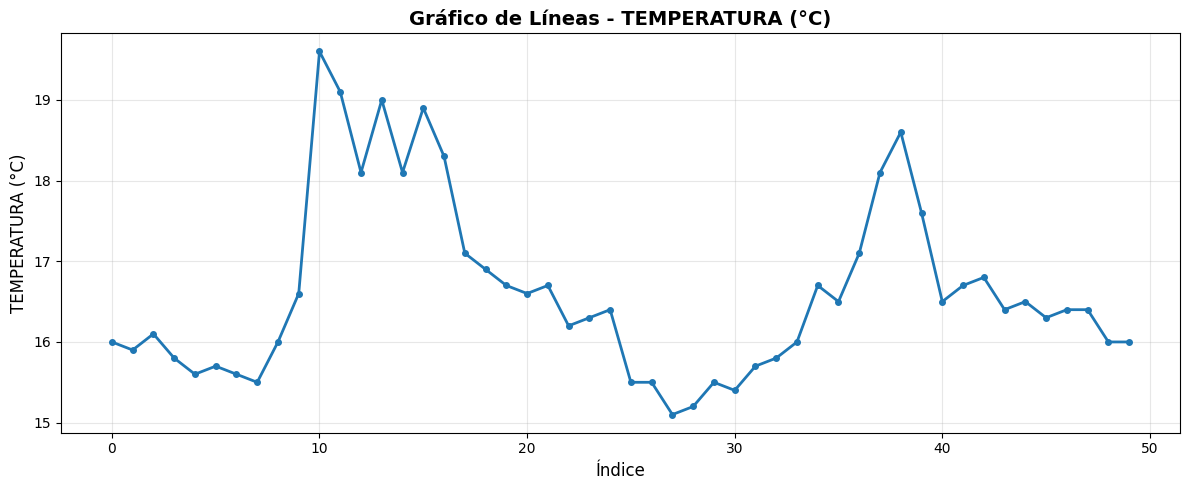

In [130]:
# Gráfico 1: Gráfico de líneas simple
if len(columnas_numericas) > 0:
    col_graficar = columnas_numericas[0]
    
    plt.figure(figsize=(12, 5))
    plt.plot(df[col_graficar].head(50), marker='o', linestyle='-', linewidth=2, markersize=4)
    plt.title(f'Gráfico de Líneas - {col_graficar}', fontsize=14, fontweight='bold')
    plt.xlabel('Índice', fontsize=12)
    plt.ylabel(col_graficar, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No hay columnas numéricas para graficar")


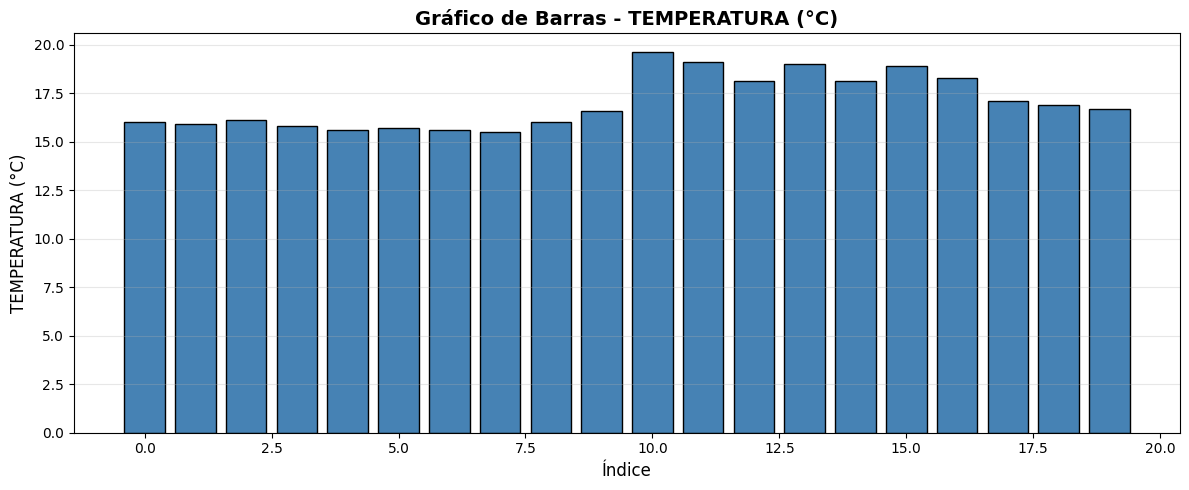

In [131]:
# Gráfico 2: Gráfico de barras
if len(columnas_numericas) > 0:
    # Tomamos solo las primeras 20 filas para que se vea mejor
    datos_barras = df[col_graficar].head(20)
    
    plt.figure(figsize=(12, 5))
    plt.bar(range(len(datos_barras)), datos_barras, color='steelblue', edgecolor='black')
    plt.title(f'Gráfico de Barras - {col_graficar}', fontsize=14, fontweight='bold')
    plt.xlabel('Índice', fontsize=12)
    plt.ylabel(col_graficar, fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No hay columnas numéricas para graficar")


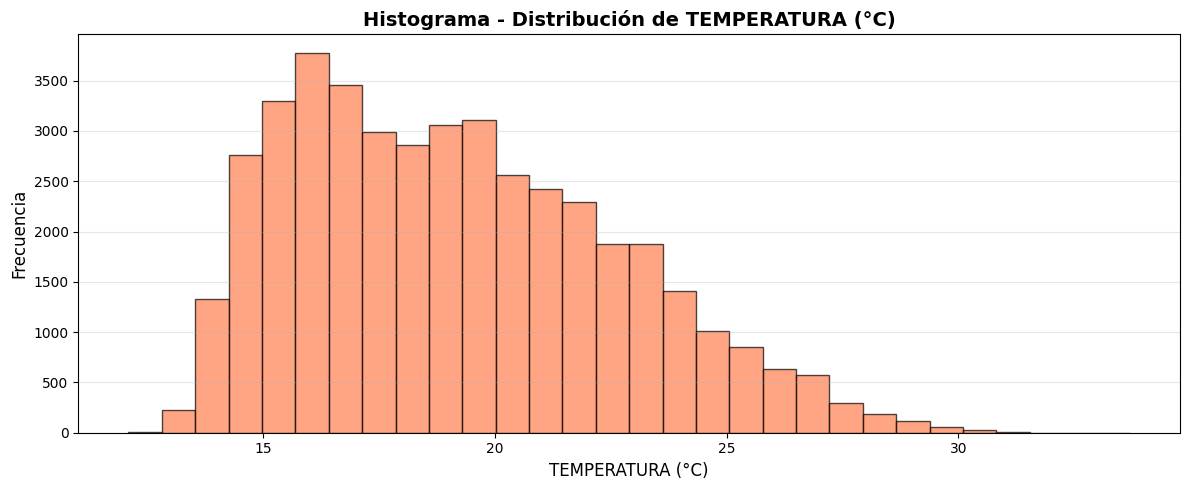

In [132]:
# Gráfico 3: Histograma (distribución de valores)
if len(columnas_numericas) > 0:
    plt.figure(figsize=(12, 5))
    plt.hist(df[col_graficar].dropna(), bins=30, color='coral', edgecolor='black', alpha=0.7)
    plt.title(f'Histograma - Distribución de {col_graficar}', fontsize=14, fontweight='bold')
    plt.xlabel(col_graficar, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No hay columnas numéricas para graficar")


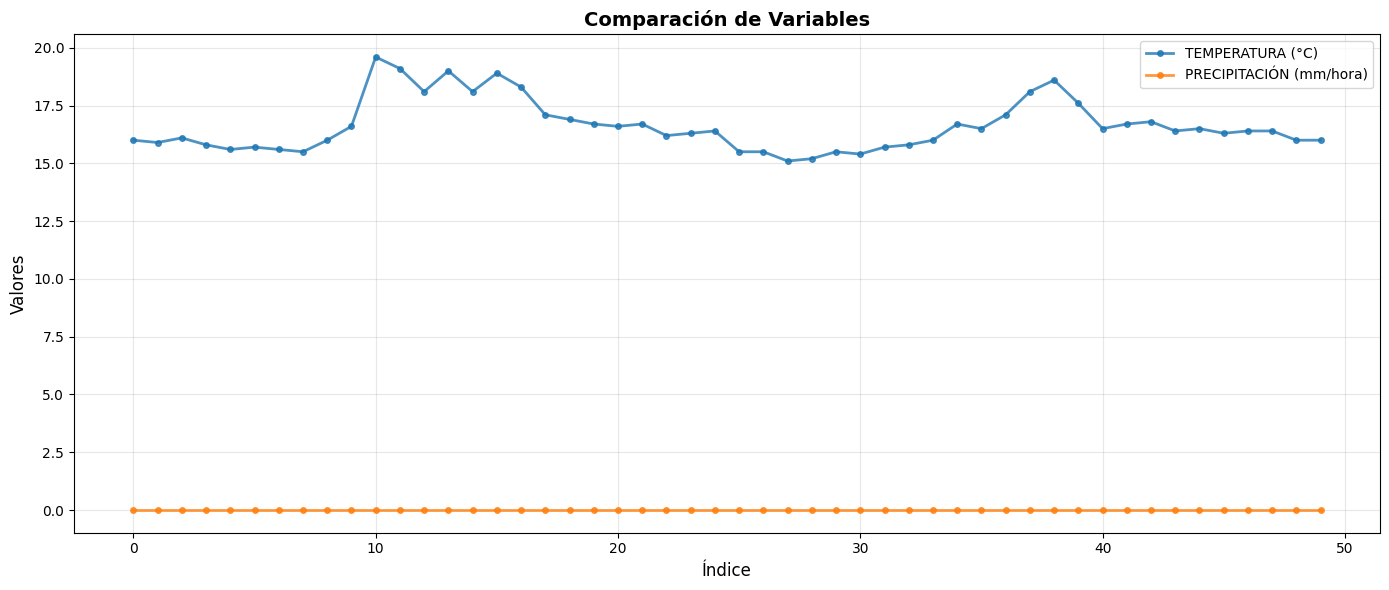

In [133]:
# Gráfico 4: Comparación de múltiples columnas
if len(columnas_numericas) >= 2:
    plt.figure(figsize=(14, 6))
    
    # Graficar las primeras 2 columnas numéricas
    for i, col in enumerate(columnas_numericas[:2]):
        plt.plot(df[col].head(50), marker='o', linestyle='-', linewidth=2, 
                markersize=4, label=col, alpha=0.8)
    
    plt.title('Comparación de Variables', fontsize=14, fontweight='bold')
    plt.xlabel('Índice', fontsize=12)
    plt.ylabel('Valores', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Se necesitan al menos 2 columnas numéricas para comparar")


## 📈 Parte 6: Uso del método .plot() de Pandas

Pandas tiene su propia forma simplificada de crear gráficos:

### 🔄 Diferencia entre Matplotlib y Pandas .plot()
| Aspecto | Matplotlib | Pandas .plot() |
|---------|-----------|----------------|
| **Sintaxis** | Más verbosa | Más concisa |
| **Control** | Total control | Control limitado pero rápido |
| **Uso** | Gráficos personalizados | Exploración rápida |

### 💡 Ventajas de .plot():
- ✅ **Menos código** - Una línea vs varias
- ✅ **Más rápido** - Ideal para exploración
- ✅ **Integrado** - Directamente desde DataFrame/Serie
- ✅ **Automático** - Maneja índices y etiquetas

### 📌 Sintaxis básica:
```python
df['columna'].plot(kind='tipo', opciones...)
```

**Tipos disponibles:** `'line'`, `'bar'`, `'hist'`, `'box'`, `'scatter'`, `'pie'`

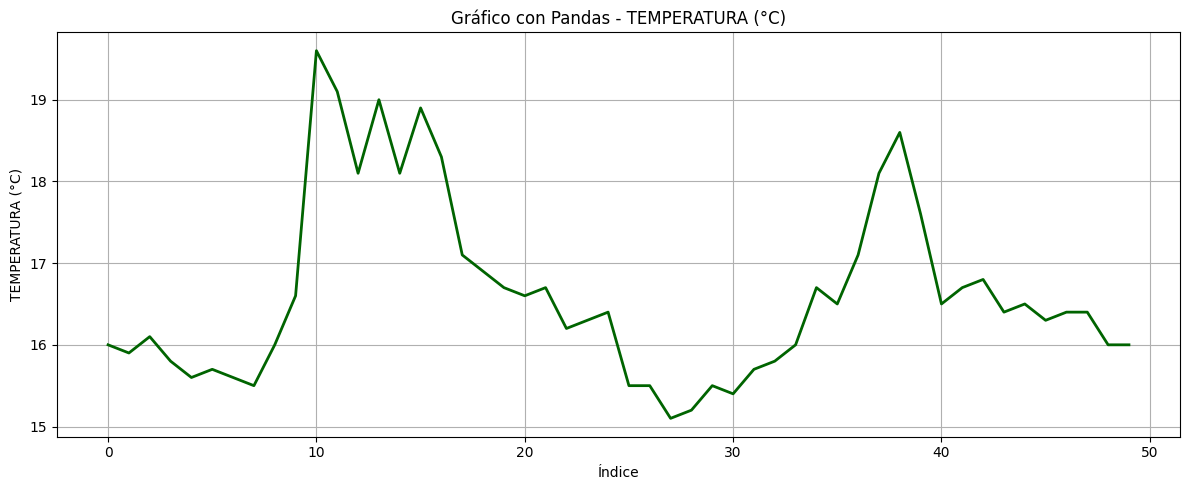

In [ ]:
# Método 1: Gráfico de líneas con Pandas
if len(columnas_numericas) > 0:
    df[col_graficar].head(50).plot(kind='line',
                                    figsize=(12, 5), 
                                    title=f'Gráfico con Pandas - {col_graficar}',
                                    color='darkgreen',
                                    linewidth=2,
                                    grid=True)
    plt.ylabel(col_graficar)
    plt.xlabel('Índice')
    plt.tight_layout()
    plt.show()


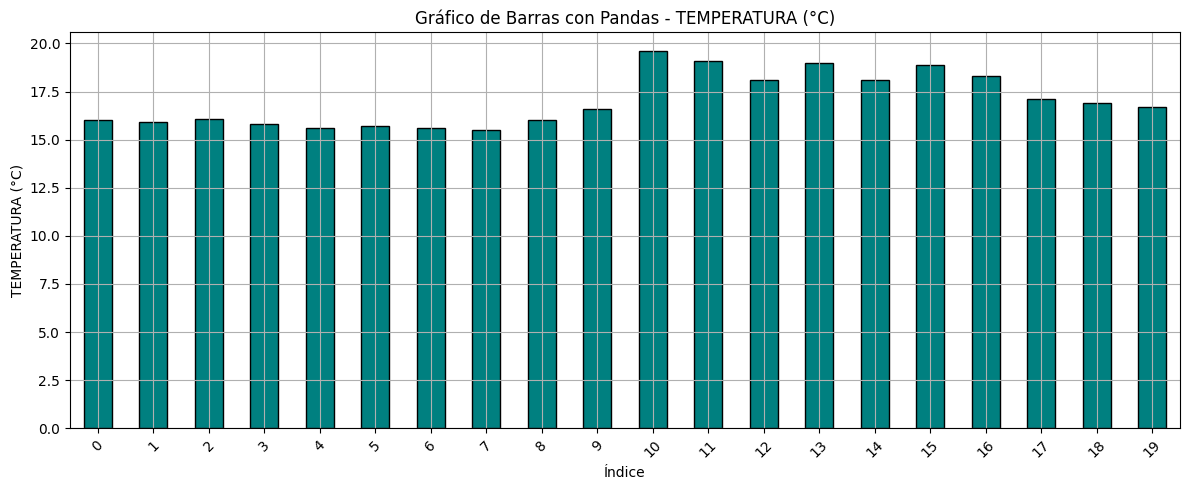

In [135]:
# Método 2: Gráfico de barras con Pandas
if len(columnas_numericas) > 0:
    df[col_graficar].head(20).plot(kind='bar', 
                                    figsize=(12, 5), 
                                    title=f'Gráfico de Barras con Pandas - {col_graficar}',
                                    color='teal',
                                    edgecolor='black',
                                    grid=True)
    plt.ylabel(col_graficar)
    plt.xlabel('Índice')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 📋 Resumen de Comandos Importantes

Esta es tu **hoja de referencia rápida** con los comandos más usados en análisis de datos con Pandas.

---

### 📂 1. Cargar Datos
```python
# CSV
df = pd.read_csv('archivo.csv')
df = pd.read_csv('archivo.csv', sep=';')           # Delimitador diferente
df = pd.read_csv('archivo.csv', encoding='utf-8')  # Codificación

# Excel
df = pd.read_excel('archivo.xlsx')
df = pd.read_excel('archivo.xlsx', sheet_name='Hoja1')  # Hoja específica
df = pd.read_excel('archivo.xlsx', nrows=100)            # Solo primeras 100 filas
```

---

### 🔍 2. Explorar Datos
```python
df.head()              # Primeras 5 filas
df.head(10)            # Primeras 10 filas
df.tail()              # Últimas 5 filas
df.info()              # Información general (tipos, nulos)
df.describe()          # Estadísticas (promedio, min, max, etc.)
df.columns             # Nombres de columnas
df.shape               # (filas, columnas)
df.dtypes              # Tipos de datos de cada columna
df.isnull().sum()      # Contar valores nulos por columna
```

---

### 🎯 3. Seleccionar y Filtrar Datos
```python
# Seleccionar columnas
df['columna']                      # Una columna (Serie)
df[['col1', 'col2']]               # Varias columnas (DataFrame)

# Filtrar filas
df[df['temperatura'] > 25]         # Filas donde temperatura > 25
df[df['ciudad'] == 'Lima']         # Filas donde ciudad es Lima
df[(df['temp'] > 20) & (df['temp'] < 30)]  # Múltiples condiciones

# Primeras/últimas N filas de una columna
df['columna'].head(10)
```

---

### 🔧 4. Limpiar y Transformar Datos
```python
# Convertir tipos de datos
df['columna'] = pd.to_numeric(df['columna'], errors='coerce')
df['fecha'] = pd.to_datetime(df['fecha'])
df['categoria'] = df['categoria'].astype('category')

# Eliminar valores nulos
df.dropna()                        # Eliminar filas con nulos
df.fillna(0)                       # Rellenar nulos con 0
df['col'].fillna(df['col'].mean()) # Rellenar con promedio
```

---

### 📊 5. Visualizar Datos

**Con Matplotlib:**
```python
plt.plot(df['columna'])            # Gráfico de líneas
plt.bar(x, y)                      # Gráfico de barras
plt.hist(df['columna'], bins=30)   # Histograma
plt.scatter(x, y)                  # Dispersión
plt.show()                         # Mostrar gráfico
```

**Con Pandas .plot():**
```python
df['columna'].plot()               # Líneas (por defecto)
df['columna'].plot.bar()           # Barras
df['columna'].plot.hist()          # Histograma
df['columna'].plot.box()           # Caja y bigotes
df.plot(x='col1', y='col2')        # X vs Y
```

---

### 💾 6. Guardar Datos
```python
df.to_csv('salida.csv', index=False)              # CSV
df.to_excel('salida.xlsx', index=False)           # Excel
df.to_excel('salida.xlsx', sheet_name='Datos')    # Excel con nombre de hoja
df.to_json('salida.json')                         # JSON
```

---

### 🔥 7. Funciones Útiles Adicionales
```python
df.sort_values('columna')          # Ordenar por columna
df.groupby('categoria').mean()     # Agrupar y promediar
df['columna'].unique()             # Valores únicos
df['columna'].value_counts()       # Contar frecuencias
df.rename(columns={'old': 'new'})  # Renombrar columnas
df.drop('columna', axis=1)         # Eliminar columna
df.drop([0, 1, 2])                 # Eliminar filas por índice
```

---

### 💡 Tip Final
**Guarda este resumen como referencia.** Estos comandos cubren el 80% del trabajo diario con datos.
